In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<h1>Load the dataset</h1>

In [35]:
df = pd.read_csv('datasets\\Family Income and Expenditure.csv')  

In [36]:
df

Total Household Income              Region  Total Food Expenditure  \
0                      480332                 CAR                  117848   
1                      198235                 CAR                   67766   
2                       82785                 CAR                   61609   
3                      107589                 CAR                   78189   
4                      189322                 CAR                   94625   
...                       ...                 ...                     ...   
41539                  119773  XII - SOCCSKSARGEN                   44875   
41540                  137320  XII - SOCCSKSARGEN                   31157   
41541                  133171  XII - SOCCSKSARGEN                   45882   
41542                  129500  XII - SOCCSKSARGEN                   81416   
41543                  128598  XII - SOCCSKSARGEN                   78195   

            Main Source of Income  Agricultural Household indicator  \
0                   Wage/Salaries                                 0   
1                   Wage/Salaries                                 0   
2                   Wage/Salaries                                 1   
3                   Wage/Salaries                                 0   
4                   Wage/Salaries                                 0   
...                           ...                               ...   
41539  Enterpreneurial Activities                                 1   
41540  Enterpreneurial Activities                                 1   
41541  Enterpreneurial Activities                                 2   
41542  Enterpreneurial Activities                                 1   
41543  Enterpreneurial Activities                                 1   

       Bread and Cereals Expenditure  Total Rice Expenditure  \
0                              42140                   38300   
1                              17329                   13008   
2                              34182                   32001   
3                              34030                   28659   
4                              34820                   30167   
...                              ...                     ...   
41539                          23675                   21542   
41540                           2691                    1273   
41541                          28646                   27339   
41542                          29996                   26655   
41543                          43485                   41205   

       Meat Expenditure  Total Fish and  marine products Expenditure  \
0                 24676                                        16806   
1                 17434                                        11073   
2                  7783                                         2590   
3                 10914                                        10812   
4                 18391                                        11309   
...                 ...                                          ...   
41539              1476                                         6120   
41540              1886                                         4386   
41541               480                                         4796   
41542              2359                                        17730   
41543              1985                                         7735   

       Fruit Expenditure  ...  Number of Refrigerator/Freezer  \
0                   3325  ...                               1   
1                   2035  ...                               0   
2                   1730  ...                               0   
3                    690  ...                               0   
4                   1395  ...                               1   
...                  ...  ...                             ...   
41539               1632  ...                               0   
41540               1840  ...                               0   
41541     

In [37]:
insights = []

<h1># Insight 1: Average Household Income by Region</h1>

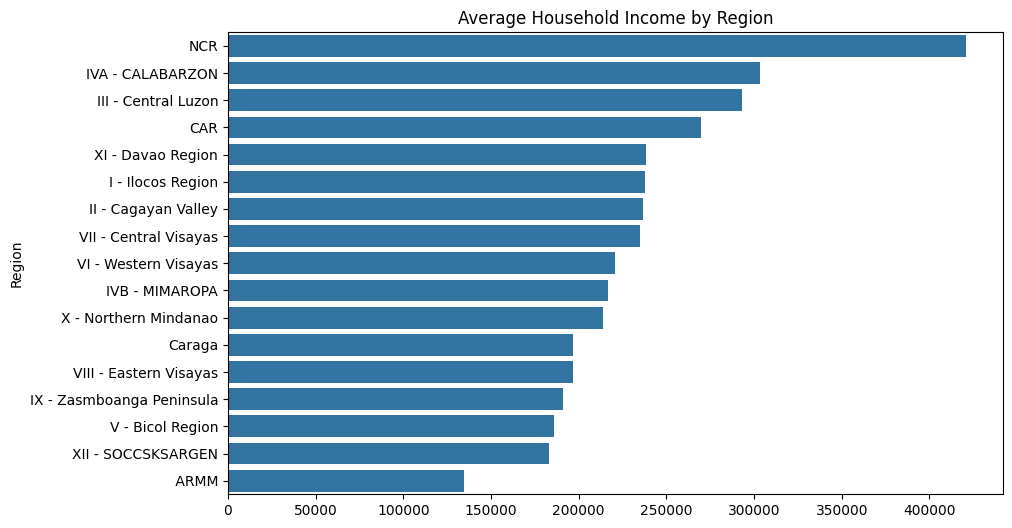

In [38]:
avg_income_by_region = df.groupby("Region")["Total Household Income"].mean().sort_values(ascending=False)
insights.append(("Which region has the highest average household income?", avg_income_by_region.idxmax()))
plt.figure(figsize=(10,6))
sns.barplot(x=avg_income_by_region.values, y=avg_income_by_region.index)
plt.title("Average Household Income by Region")
plt.show()

<h2># Insight 2: Average Food Expenditure by Region</h2>

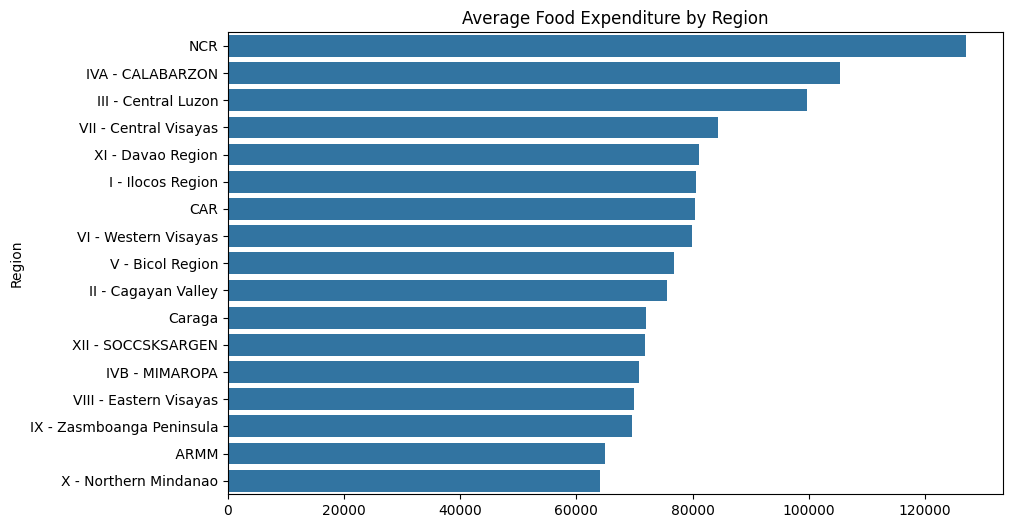

In [39]:
avg_food_by_region = df.groupby("Region")["Total Food Expenditure"].mean().sort_values(ascending=False)
insights.append(("Which region spends the most on food?", avg_food_by_region.idxmax()))
plt.figure(figsize=(10,6))
sns.barplot(x=avg_food_by_region.values, y=avg_food_by_region.index)
plt.title("Average Food Expenditure by Region")
plt.show()

<h1># Insight 3: Correlation between Income and Food Expenditure</h1>

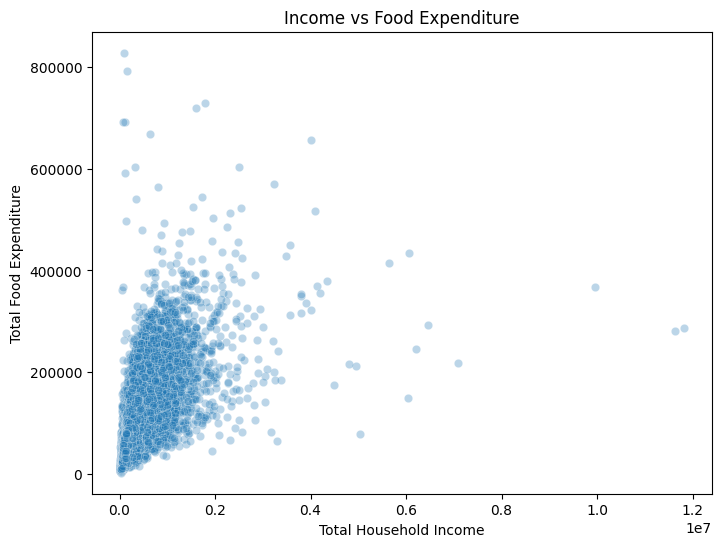

In [40]:
corr_income_food = df["Total Household Income"].corr(df["Total Food Expenditure"])
insights.append(("Is there a correlation between income and food expenditure?", f"{corr_income_food:.2f}"))
plt.figure(figsize=(8,6))
sns.scatterplot(x="Total Household Income", y="Total Food Expenditure", data=df, alpha=0.3)
plt.title("Income vs Food Expenditure")
plt.show()

<h1># Insight 4: Highest Non-Food Expenditure Category</h1>

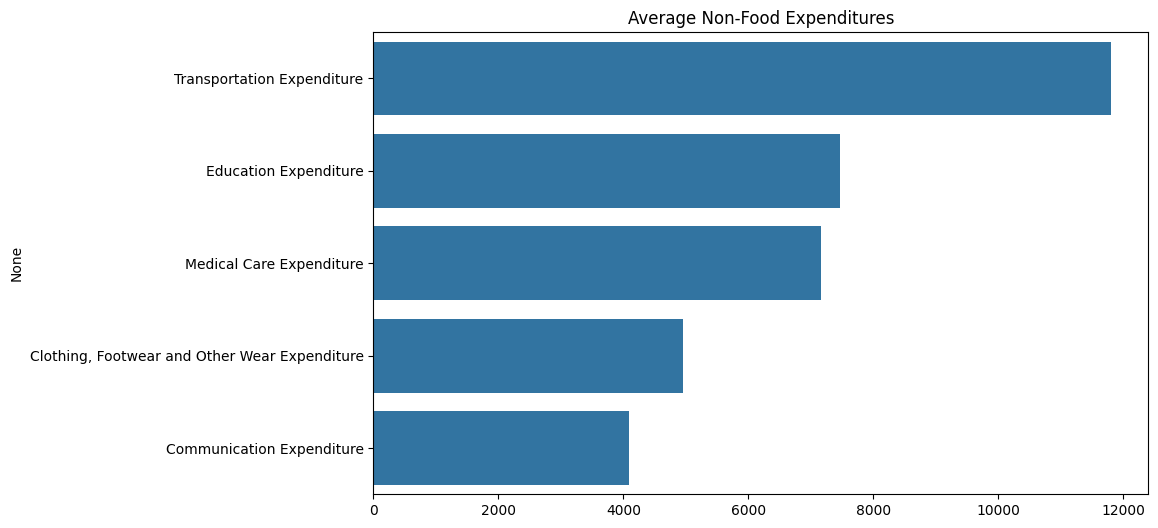

In [41]:
non_food_cols = [
    "Education Expenditure", "Medical Care Expenditure",
    "Transportation Expenditure", "Communication Expenditure",
    "Clothing, Footwear and Other Wear Expenditure"
]
avg_non_food = df[non_food_cols].mean().sort_values(ascending=False)
insights.append(("Which non-food category has the highest average expenditure?", avg_non_food.idxmax()))
plt.figure(figsize=(10,6))
sns.barplot(x=avg_non_food.values, y=avg_non_food.index)
plt.title("Average Non-Food Expenditures")
plt.show()

<h1># Insight 5: Income Quartiles and Family Size</h1>

C:\Users\Admin\AppData\Local\Temp\ipykernel_5596\2305917765.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_family_size = df.groupby("income_quartile")["Total Number of Family members"].mean()


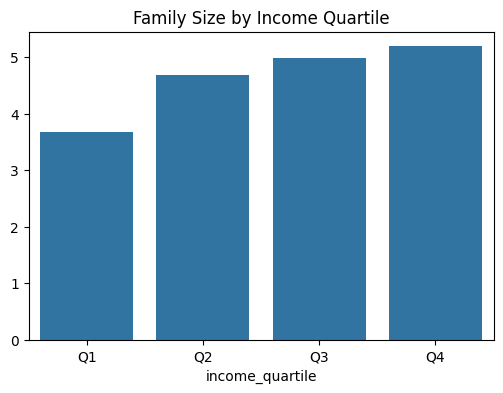

In [42]:
df["income_quartile"] = pd.qcut(df["Total Household Income"], 4, labels=["Q1", "Q2", "Q3", "Q4"])
avg_family_size = df.groupby("income_quartile")["Total Number of Family members"].mean()
insights.append(("Which income quartile has the largest average family size?", avg_family_size.idxmax()))
plt.figure(figsize=(6,4))
sns.barplot(x=avg_family_size.index, y=avg_family_size.values)
plt.title("Family Size by Income Quartile")
plt.show()


<h1># Insight 6: Average Medical Care Expenditure by Region</h1>

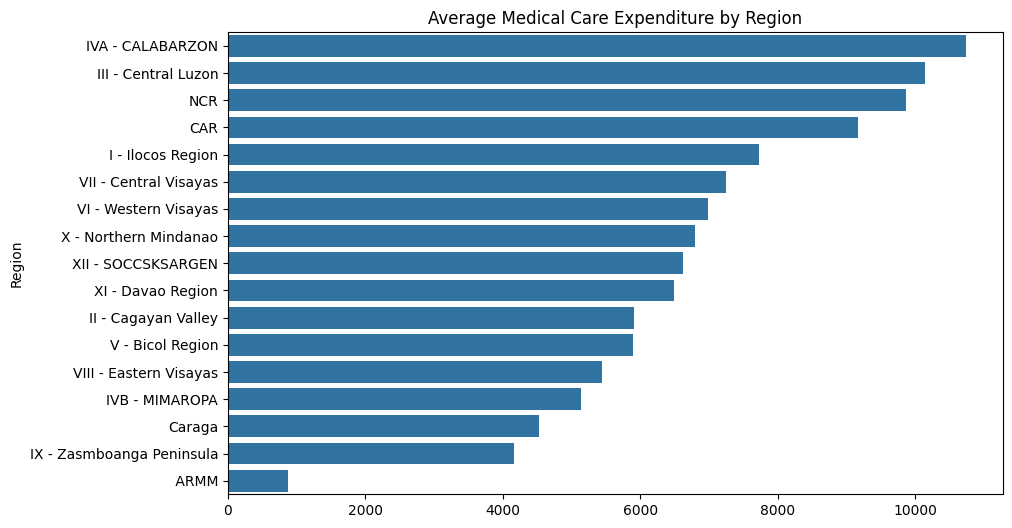

In [44]:
avg_medical_by_region = df.groupby("Region")["Medical Care Expenditure"].mean().sort_values(ascending=False)
insights.append(("Which region spends the most on medical care?", avg_medical_by_region.idxmax()))
plt.figure(figsize=(10,6))
sns.barplot(x=avg_medical_by_region.values, y=avg_medical_by_region.index)
plt.title("Average Medical Care Expenditure by Region")
plt.show()

<h1># Insight 7: Average Education Expenditure by Region</h1>

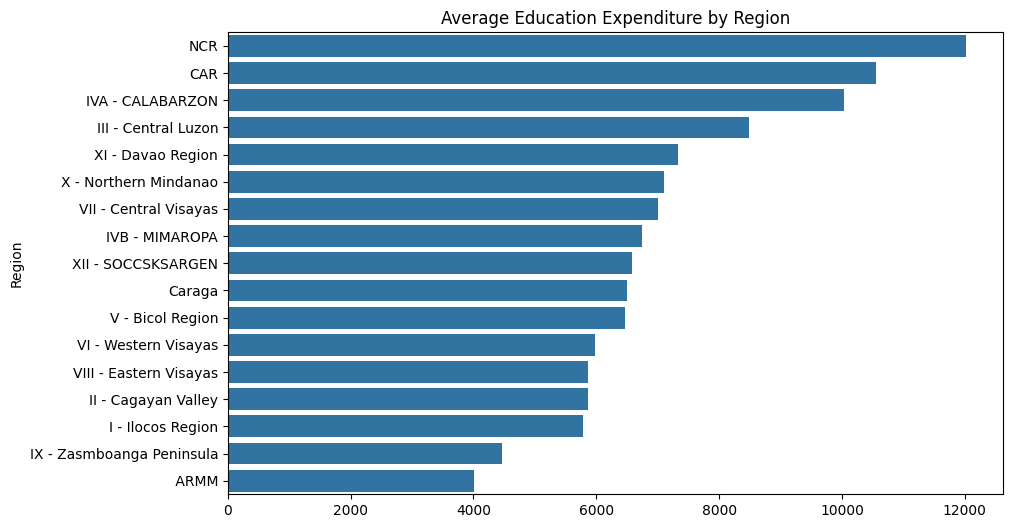

In [45]:
avg_education_by_region = df.groupby("Region")["Education Expenditure"].mean().sort_values(ascending=False)
insights.append(("Which region spends the most on education?", avg_education_by_region.idxmax()))
plt.figure(figsize=(10,6))
sns.barplot(x=avg_education_by_region.values, y=avg_education_by_region.index)
plt.title("Average Education Expenditure by Region")
plt.show()

<h1># Insight 8: Average Transportation Expenditure by Region</h1>

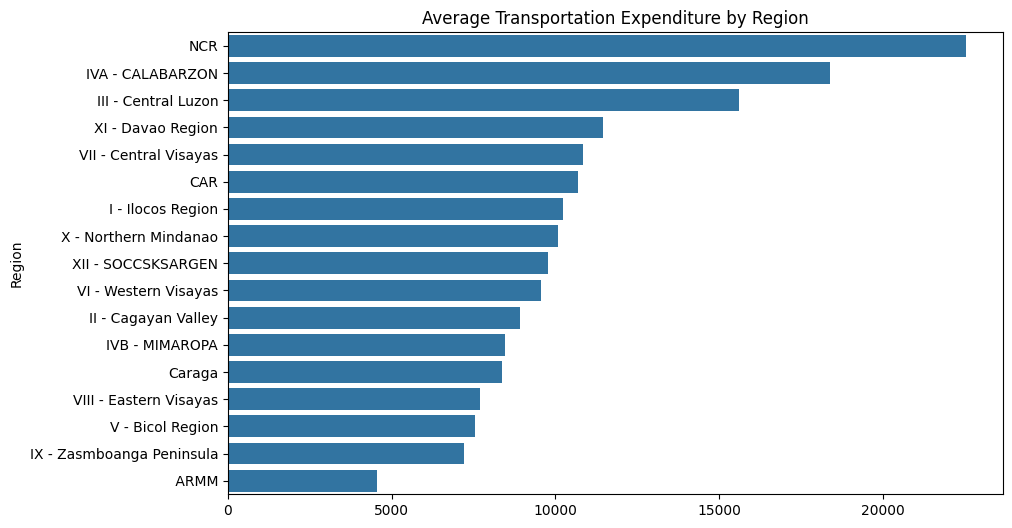

In [46]:
avg_transport_by_region = df.groupby("Region")["Transportation Expenditure"].mean().sort_values(ascending=False)
insights.append(("Which region spends the most on transportation?", avg_transport_by_region.idxmax()))
plt.figure(figsize=(10,6))
sns.barplot(x=avg_transport_by_region.values, y=avg_transport_by_region.index)
plt.title("Average Transportation Expenditure by Region")
plt.show()

<h1># Insight 9: Average Communication Expenditure by Region</h1>

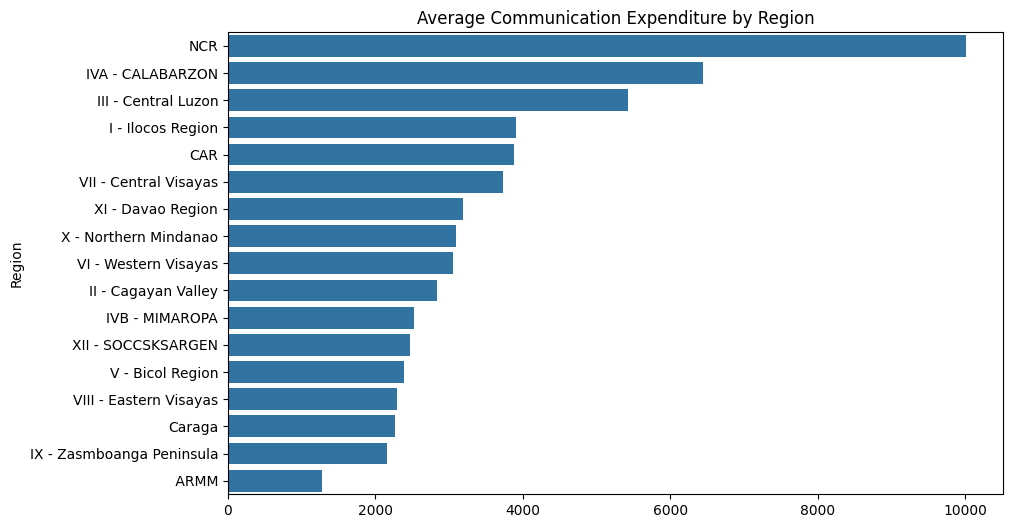

In [47]:
avg_comm_by_region = df.groupby("Region")["Communication Expenditure"].mean().sort_values(ascending=False)
insights.append(("Which region spends the most on communication?", avg_comm_by_region.idxmax()))
plt.figure(figsize=(10,6))
sns.barplot(x=avg_comm_by_region.values, y=avg_comm_by_region.index)
plt.title("Average Communication Expenditure by Region")
plt.show()

<h1># Insight 10: Average Clothing Expenditure by Region</h1>

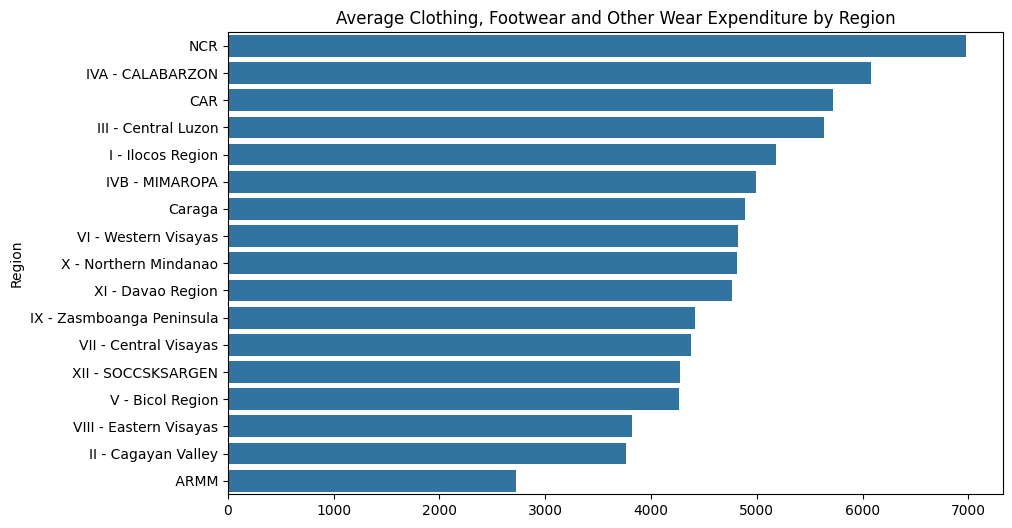

In [48]:
avg_clothing_by_region = df.groupby("Region")["Clothing, Footwear and Other Wear Expenditure"].mean().sort_values(ascending=False)
insights.append(("Which region spends the most on clothing and footwear?", avg_clothing_by_region.idxmax()))
plt.figure(figsize=(10,6))
sns.barplot(x=avg_clothing_by_region.values, y=avg_clothing_by_region.index)
plt.title("Average Clothing, Footwear and Other Wear Expenditure by Region")
plt.show()

<h1># Insight 11: Food Expenditure as a Percentage of Income</h1>

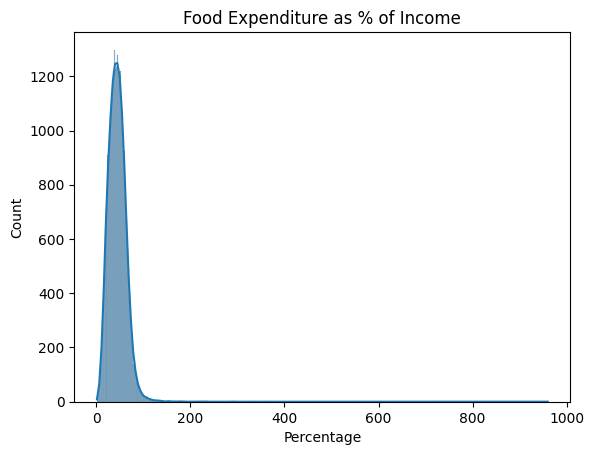

In [49]:
df["Food_Exp_Percent"] = df["Total Food Expenditure"] / df["Total Household Income"] * 100
avg_food_exp_percent = df["Food_Exp_Percent"].mean()
insights.append(("What is the average percentage of income spent on food?", f"{avg_food_exp_percent:.2f}%"))
sns.histplot(df["Food_Exp_Percent"], kde=True)
plt.title("Food Expenditure as % of Income")
plt.xlabel("Percentage")
plt.show()

<h1># Insight 12: Households with Food Expenditure Greater than 50% of Income</h1>

In [50]:
high_food_exp = (df["Food_Exp_Percent"] > 50).sum()
insights.append(("How many households spend more than 50% of their income on food?", high_food_exp))
print(f"Households spending >50% of income on food: {high_food_exp}")

Households spending >50% of income on food: 15249


<h1># Insight 13: Correlation Matrix of All Numeric Features</h1>

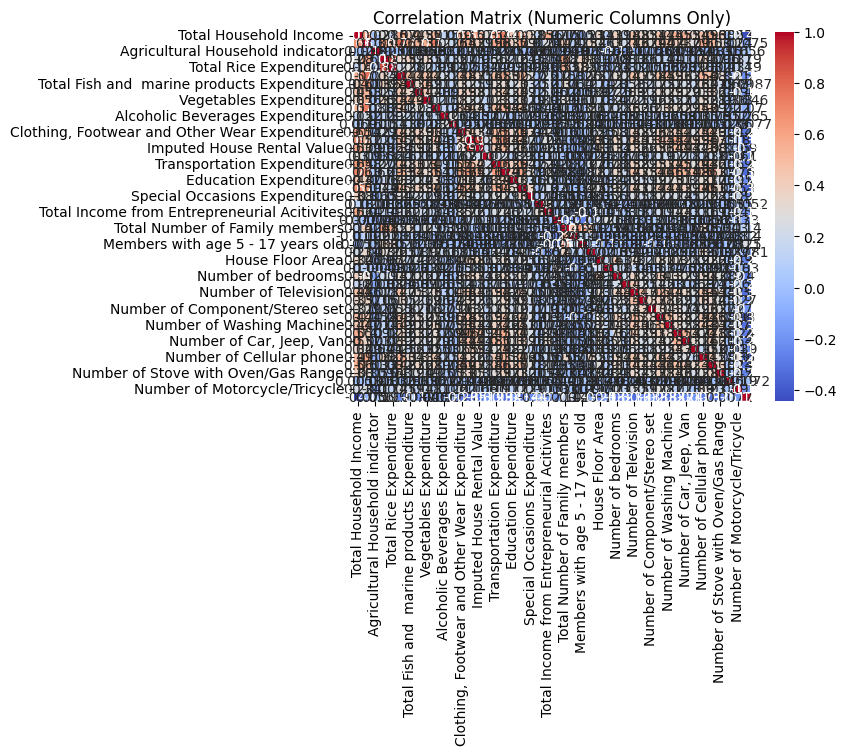

In [52]:
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Columns Only)")
plt.show()

<h1># Insight 14: Outliers in Total Household Income</h1>

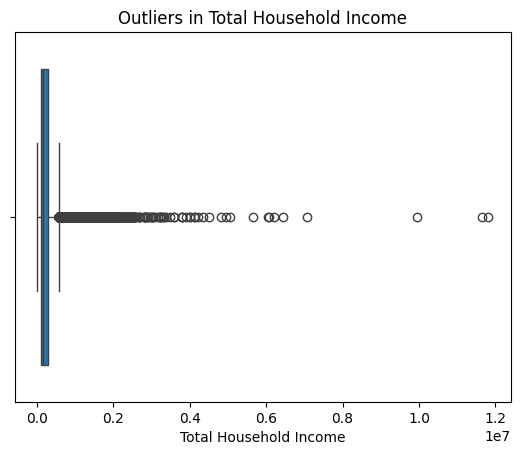

In [53]:
sns.boxplot(x=df["Total Household Income"])
plt.title("Outliers in Total Household Income")
plt.show()

<h1># Insight 15: Outliers in Total Food Expenditure</h1>

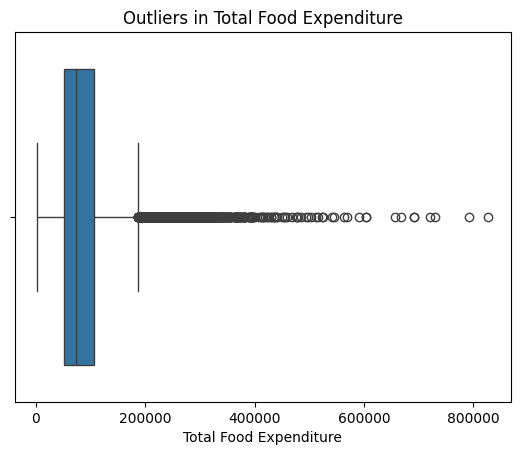

In [54]:
sns.boxplot(x=df["Total Food Expenditure"])
plt.title("Outliers in Total Food Expenditure")
plt.show()

<h1># Insight 16: Distribution of Family Size</h1>

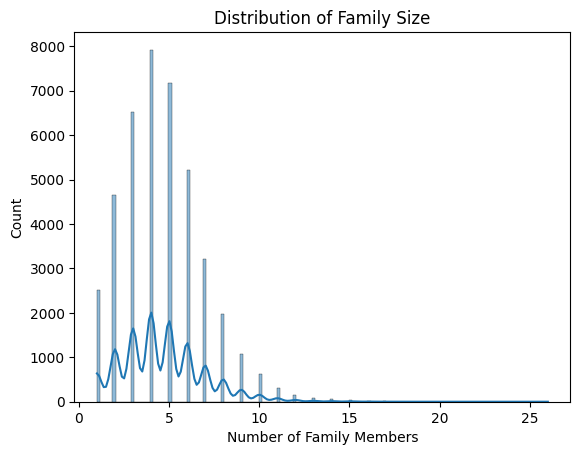

In [55]:
sns.histplot(df["Total Number of Family members"], kde=True)
plt.title("Distribution of Family Size")
plt.xlabel("Number of Family Members")
plt.show()

<h1># Insight 17: Average Income by Family Size Group</h1>

C:\Users\Admin\AppData\Local\Temp\ipykernel_5596\713554239.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_income_by_fam_size = df.groupby("Family_Size_Group")["Total Household Income"].mean()


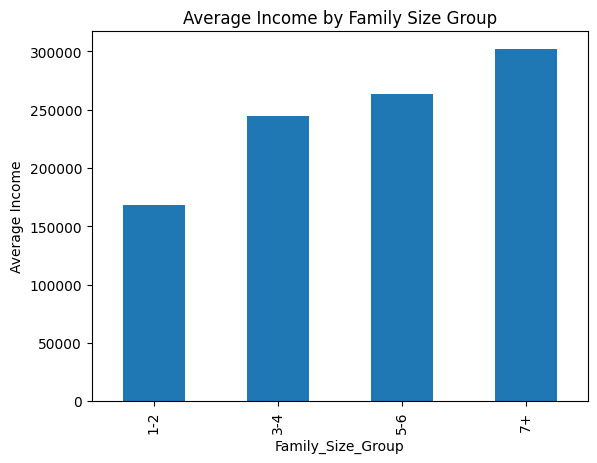

In [56]:
df["Family_Size_Group"] = pd.cut(df["Total Number of Family members"], bins=[0,2,4,6,100], labels=["1-2","3-4","5-6","7+"])
avg_income_by_fam_size = df.groupby("Family_Size_Group")["Total Household Income"].mean()
insights.append(("Which family size group has the highest average income?", avg_income_by_fam_size.idxmax()))
avg_income_by_fam_size.plot(kind='bar')
plt.title("Average Income by Family Size Group")
plt.ylabel("Average Income")
plt.show()

<h1># Insight 18: Average Food Expenditure by Family Size Group</h1>

C:\Users\Admin\AppData\Local\Temp\ipykernel_5596\1937851318.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_food_by_fam_size = df.groupby("Family_Size_Group")["Total Food Expenditure"].mean()


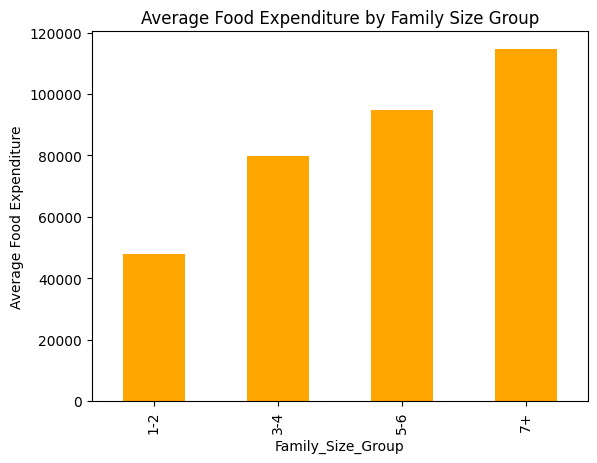

In [57]:
avg_food_by_fam_size = df.groupby("Family_Size_Group")["Total Food Expenditure"].mean()
insights.append(("Which family size group spends the most on food?", avg_food_by_fam_size.idxmax()))
avg_food_by_fam_size.plot(kind='bar', color='orange')
plt.title("Average Food Expenditure by Family Size Group")
plt.ylabel("Average Food Expenditure")
plt.show()

<h1># Insight 19: Top 5 Households by Total Income</h1>

In [58]:
top5_income = df.nlargest(5, "Total Household Income")[["Region", "Total Household Income"]]
insights.append(("Which households have the highest income?", top5_income))
print(top5_income)

                       Region  Total Household Income
2139     VI - Western Visayas                11815988
1238     VI - Western Visayas                11639365
30865  VIII - Eastern Visayas                 9952913
9382    VII - Central Visayas                 7082152
39302                     NCR                 6452314


<h1># Insight 20: Top 5 Households by Total Food Expenditure</h1>

In [59]:
top5_food = df.nlargest(5, "Total Food Expenditure")[["Region", "Total Food Expenditure"]]
insights.append(("Which households spend the most on food?", top5_food))
print(top5_food)

                      Region  Total Food Expenditure
9292   VII - Central Visayas                  827565
4159   VII - Central Visayas                  791848
31997     XII - SOCCSKSARGEN                  729606
530                   Caraga                  720007
32742     XII - SOCCSKSARGEN                  691917
